In [75]:
import os

print(os.getcwd())
print(os.listdir())

/home/notvisal/Desktop/Intern/Knife_Sharpness_Dataset
['.idea', '.python-version', 'token.txt', '.git', '.ipynb_checkpoints', 'Theme2', '.venv', 'Better data analysis.ipynb', 'data.ipynb', 'acceleration_data.csv']


In [76]:
import pandas as pd
import numpy as np

df = pd.read_csv('acceleration_data.csv')

df.head()

,Frame,Label,Pelvis x,Pelvis y,Pelvis z,L5 x,L5 y,L5 z,L3 x,L3 y,...,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z,sharpness,sheet_type
0,0,4,0.0,0.0,0.0,-1.640562,-0.345798,-0.666146,-2.369700,-0.499486,...,-2.060481,-1.485525,-2.185359,-1.194785,-1.663235,-2.185359,-1.194785,-1.663235,64,Segment Acceleration
1,1,4,0.0,0.0,0.0,-0.705326,-0.629461,-0.983502,-1.043948,-0.907626,...,-2.689504,-1.314239,-1.060466,-1.162565,-1.845591,-1.064713,-1.147108,-1.845636,64,Segment Acceleration
2,2,4,0.0,0.0,0.0,-1.146854,-0.839369,-0.862127,-1.683033,-1.219342,...,-2.178955,-1.321744,-0.220440,-1.530509,-1.658241,-0.227187,-1.514522,-1.657987,64,Segment Acceleration
3,3,4,0.0,0.0,0.0,-0.065640,-0.431009,-0.488192,-0.426137,-0.574987,...,-0.951495,-1.324380,-0.175790,-1.007643,-1.326566,-0.091278,-0.986575,-1.316862,64,Segment Acceleration
4,4,4,0.0,0.0,0.0,0.652927,-0.046127,0.174043,0.920047,-0.080622,...,-0.402592,-0.509365,0.347853,-0.509991,-0.538392,0.335083,-0.493518,-0.537629,64,Segment Acceleration


In [77]:
df.shape

(151158, 73)

In [78]:
ALL_PATHS = [
    'Theme2/P1/Boning/MVN-J-Boning-64-001.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-90-003.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-90-002.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-90-004.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-006.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-004.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-002.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-90-001.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-003.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-79-001.xlsx', 
    'Theme2/P1/Boning/MVN-J-Boning-64-005.xlsx',
    'Theme2/P1/Slicing/MVN-J-Slicing-64-001.xlsx', 
    'Theme2/P1/Slicing/MVN-J-Slicing-87-001.xlsx', 
    'Theme2/P1/Slicing/MVN-J-Slicing-73-001.xlsx',
    'Theme2/P2/Boning/MVN-S-Boning-89-001.xlsx', 
    'Theme2/P2/Boning/MVN-S-Boning-89-002.xlsx', 
    'Theme2/P2/Boning/MVN-S-Boning-89-003.xlsx', 
    'Theme2/P2/Boning/MVN-S-Boning-76-001.xlsx', 
    'Theme2/P2/Boning/MVN-S-Boning-63-003.xlsx', 
    'Theme2/P2/Boning/MVN-S-Boning-63-001.xlsx', 
    'Theme2/P2/Boning/MVN-S-Boning-76-002.xlsx', 
    'Theme2/P2/Boning/MVN-S-Boning-63-002.xlsx', 
    'Theme2/P2/Boning/MVN-S-Boning-89-004.xlsx',
    'Theme2/P2/Slicing/MVN-S-Slicing-87-001.xlsx', 
    'Theme2/P2/Slicing/MVN-S-Slicing-73-001.xlsx', 
    'Theme2/P2/Slicing/MVN-S-Slicing-63-001.xlsx'
]

ACCELERATION_SHEETS = [
    'Segment Acceleration', 
    'Segment Angular Acceleration'
]

In [79]:
# from collections import defaultdict

# sharpness_levels = [64, 79, 90, 87, 73, 63, 76, 89]

# def process_acceleration_data(file_paths, sharpness_levels):
#     """Process acceleration data from multiple Excel files with different sharpness levels."""
#     # Dictionary to store processed data by sheet type
#     sheet_data = defaultdict(list)
    
#     # Process all files and extract data by sheet type
#     for file_path, sharpness in zip(file_paths, sharpness_levels):
#         try:
#             xls = pd.ExcelFile(file_path)
            
#             for sheet_name in xls.sheet_names:
#                 if sheet_name not in ACCELERATION_SHEETS:
#                     continue
                
#                 try:
#                     # Read the sheet
#                     df = pd.read_excel(xls, sheet_name=sheet_name)
#                     print(f"{df.shape}")
                    
#                     if df.empty:
#                         continue

#                     if 'Label' not in df.columns:
#                         print(f"Skipping {sheet_name} since it doesn't have a label column")
#                         continue
                    
#                     # Add sharpness column
#                     df['sharpness'] = sharpness
                    
#                     # Add sheet name as a column to differentiate data source
#                     df['sheet_type'] = sheet_name
                    
#                     # Add to our collection
#                     sheet_data[sheet_name].append(df)
                
#                 except Exception as e:
#                     print(f"Error processing sheet {file_path} {sheet_name}: {e}")
        
#         except Exception as e:
#             print(f"Error processing file {file_path}: {e}")
    
#     # Combine data from all files
#     combined_dfs = []
    
#     for sheet_name, dfs in sheet_data.items():
#         if dfs:
#             # Concatenate all data for this sheet type
#             sheet_combined_df = pd.concat(dfs, ignore_index=True)
#             combined_dfs.append(sheet_combined_df)
    
#     # Return combined data frame
#     if combined_dfs:
#         final_df = pd.concat(combined_dfs, ignore_index=True)
#         return final_df
    
#     return None

# def main():
#     # Process the data
#     merged_df = process_acceleration_data(
#         file_paths=ALL_PATHS,
#         sharpness_levels=sharpness_levels
#     )
    
#     if merged_df is None or merged_df.empty:
#         print("No results generated!")
#         return
    
#     # Save the final merged dataframe
#     output_file = "acceleration_data.csv"
#     merged_df.to_csv(output_file, index=False)
#     print(f"Saved data to {output_file} ({merged_df.shape[0]} rows, {merged_df.shape[1]} columns)")

# if __name__ == "__main__":
#     main()

In [80]:
df = pd.read_csv('acceleration_data.csv')

In [81]:
df.columns.tolist()

['Frame',
 'Label',
 'Pelvis x',
 'Pelvis y',
 'Pelvis z',
 'L5 x',
 'L5 y',
 'L5 z',
 'L3 x',
 'L3 y',
 'L3 z',
 'T12 x',
 'T12 y',
 'T12 z',
 'T8 x',
 'T8 y',
 'T8 z',
 'Neck x',
 'Neck y',
 'Neck z',
 'Head x',
 'Head y',
 'Head z',
 'Right Shoulder x',
 'Right Shoulder y',
 'Right Shoulder z',
 'Right Upper Arm x',
 'Right Upper Arm y',
 'Right Upper Arm z',
 'Right Forearm x',
 'Right Forearm y',
 'Right Forearm z',
 'Right Hand x',
 'Right Hand y',
 'Right Hand z',
 'Left Shoulder x',
 'Left Shoulder y',
 'Left Shoulder z',
 'Left Upper Arm x',
 'Left Upper Arm y',
 'Left Upper Arm z',
 'Left Forearm x',
 'Left Forearm y',
 'Left Forearm z',
 'Left Hand x',
 'Left Hand y',
 'Left Hand z',
 'Right Upper Leg x',
 'Right Upper Leg y',
 'Right Upper Leg z',
 'Right Lower Leg x',
 'Right Lower Leg y',
 'Right Lower Leg z',
 'Right Foot x',
 'Right Foot y',
 'Right Foot z',
 'Right Toe x',
 'Right Toe y',
 'Right Toe z',
 'Left Upper Leg x',
 'Left Upper Leg y',
 'Left Upper Leg z',
 '

In [82]:
def create_composite_features(df):
    """
    Create composite features from motion capture data - optimized for performance
    """
    # Columns to preserve
    preserved_columns = {}
    if 'Label' in df.columns:
        preserved_columns['Label'] = df['Label']
    if 'sharpness' in df.columns:
        preserved_columns['sharpness'] = df['sharpness']
    
    # Get all unique body parts
    body_parts = set()
    for col in df.columns:
        if col.endswith(' x') or col.endswith(' y') or col.endswith(' z'):
            body_part = col[:-2]  # Remove the ' x', ' y', or ' z' suffix
            body_parts.add(body_part)
    
    # Dictionary to collect all features
    all_features = {}
    
    # Create aggregated features for each body part
    for body_part in body_parts:
        # Extract x, y, z components
        x_col = f"{body_part} x"
        y_col = f"{body_part} y"
        z_col = f"{body_part} z"
        
        # Skip if any component is missing
        if not (x_col in df.columns and y_col in df.columns and z_col in df.columns):
            continue
        
        # 1. RMS of x and y ("mean")
        all_features[f"{body_part}_mean"] = np.sqrt((df[x_col]**2 + df[y_col]**2) / 2)
        
        # 2. RMS of y and z ("standard deviation")
        all_features[f"{body_part}_std"] = np.sqrt((df[y_col]**2 + df[z_col]**2) / 2)
        
        # 3. RMS of z and x ("min")
        all_features[f"{body_part}_min"] = np.sqrt((df[z_col]**2 + df[x_col]**2) / 2)
        
        # 4. RMS of x, y, and z ("max")
        all_features[f"{body_part}_max"] = np.sqrt((df[x_col]**2 + df[y_col]**2 + df[z_col]**2) / 3)
        
        # 5. Roll calculation ("Area under the curve")
        denominator = np.sqrt(df[x_col]**2 + df[z_col]**2)
        denominator = np.where(denominator == 0, 1e-10, denominator)
        all_features[f"{body_part}_AUC"] = 180 * np.arctan2(df[y_col], denominator) / np.pi
        
        # 6. Pitch calculation ("peaks")
        denominator = np.sqrt(df[y_col]**2 + df[z_col]**2)
        denominator = np.where(denominator == 0, 1e-10, denominator)
        all_features[f"{body_part}_peaks"] = 180 * np.arctan2(df[x_col], denominator) / np.pi
    
    # Combine preserved columns and features
    all_features.update(preserved_columns)
    
    # Create DataFrame in one go
    aggregated_features = pd.DataFrame(all_features)
    
    return aggregated_features

In [83]:
df = create_composite_features(df)

In [84]:
df.columns

Index(['Left Foot_mean', 'Left Foot_std', 'Left Foot_min', 'Left Foot_max',
       'Left Foot_AUC', 'Left Foot_peaks', 'L3_mean', 'L3_std', 'L3_min',
       'L3_max',
       ...
       'Right Toe_AUC', 'Right Toe_peaks', 'Left Forearm_mean',
       'Left Forearm_std', 'Left Forearm_min', 'Left Forearm_max',
       'Left Forearm_AUC', 'Left Forearm_peaks', 'Label', 'sharpness'],
      dtype='object', length=140)

In [85]:
max_features = [col for col in df.columns if col.endswith('_max')]
if 'Label' and 'sharpness' in df.columns:
    max_features.append('Label')
    max_features.append('sharpness')

df_max = df[max_features]

In [86]:
df_max.columns.tolist()

['Left Foot_max',
 'L3_max',
 'Right Upper Leg_max',
 'T12_max',
 'Right Lower Leg_max',
 'Head_max',
 'Left Lower Leg_max',
 'Left Toe_max',
 'Left Hand_max',
 'Left Upper Arm_max',
 'Right Forearm_max',
 'Right Shoulder_max',
 'Left Upper Leg_max',
 'Right Foot_max',
 'Right Hand_max',
 'Right Upper Arm_max',
 'L5_max',
 'Left Shoulder_max',
 'Pelvis_max',
 'T8_max',
 'Neck_max',
 'Right Toe_max',
 'Left Forearm_max',
 'Label',
 'sharpness']

Cross-validation Accuracy: 0.6225 ± 0.0039
Test Accuracy: 0.6232468907118285
              precision    recall  f1-score   support

           0       0.73      0.42      0.54      7240
           1       0.37      0.70      0.49      3476
           2       0.51      0.60      0.55      7220
           3       0.28      0.45      0.34      2481
           4       0.88      0.73      0.80     22708
           5       0.22      0.33      0.26      2223

    accuracy                           0.62     45348
   macro avg       0.50      0.54      0.50     45348
weighted avg       0.69      0.62      0.64     45348

Confusion Matrix:
[[ 3075  1090  1627   355   517   576]
 [  175  2416   143   296   192   254]
 [  522   624  4337   533   744   460]
 [   80   519   172  1110   400   200]
 [  262  1222  1999  1445 16587  1193]
 [  109   600   154   282   340   738]]


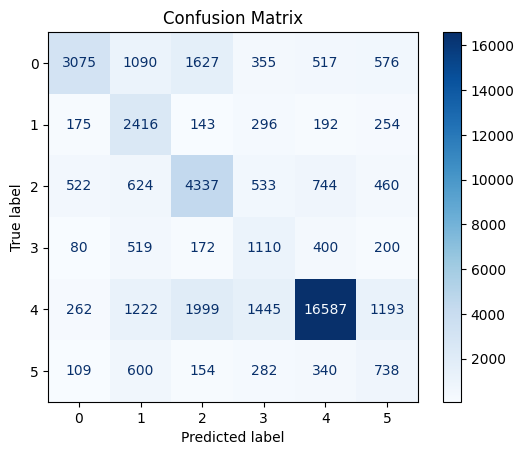

In [91]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_max is your DataFrame with composite max features plus the 'Label' column.
# Split features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Split into training and test sets (e.g., 70/30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Normalize features (optional, but often useful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a Random Forest classifier with tuned hyperparameters
rf = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    max_depth=10,        # Maximum depth of each tree (adjust as needed)
    min_samples_split=5, # Minimum samples required to split an internal node
    min_samples_leaf=2,  # Minimum samples required to be at a leaf node
    random_state=42,
    n_jobs=-1,            # Use all available CPU cores
    class_weight='balanced'
)

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy: {:.4f} ± {:.4f}".format(cv_scores.mean(), cv_scores.std()))

# Fit the model on the entire training set
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set and evaluate performance
y_pred = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf
from collections import Counter
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPool1D, GlobalAveragePooling1D, BatchNormalization, Dense, Activation

# Assume df is your original dataframe with shape (150000, 140)
# and that it contains the columns 'Label' (activity), 'sharpness', and other numeric features.
# The combined target (for oversampling) is built as: activity_sharpness.

# ------------------------------
# 1. Split Original Data into Train+Val and Test Sets
# ------------------------------
train_val_dataset = df_max.sample(frac=0.7, random_state=42)
test_dataset = df_max.drop(train_val_dataset.index)

# ------------------------------
# 2. Split Train+Val into Training and Validation Sets
# ------------------------------
# Stratify by 'Label' to preserve class distribution.
train_dataset, val_dataset = train_test_split(
    train_val_dataset, 
    test_size=0.2, 
    random_state=42, 
    stratify=train_val_dataset['Label']
)

# ===============================
# (A) Prepare RAW Training Data (No Oversampling)
# ===============================
# Create raw training features and labels.
raw_train_features = train_dataset.copy()  # copy all columns
raw_train_labels = raw_train_features.pop('Label')  # remove 'Label' column

# List of numeric columns (all columns of interest, including 'sharpness' etc.)
numeric_cols = df_max.select_dtypes(include=['int', 'int64', 'float', 'float64']).columns.tolist()

# Ensure our raw training features include the columns we need.
# (They should, since train_dataset was a subset of df.)

# Define the numeric columns to be scaled.
# (For scaling, exclude columns that you don't want to scale; here we exclude 'Label' and 'sharpness' if needed.)
numerical_cols_for_scaling = [col for col in numeric_cols if col not in ['Label', 'sharpness']]

# Initialize and fit the scaler on raw training data.
scaler = RobustScaler()
raw_train_features[numerical_cols_for_scaling] = scaler.fit_transform(raw_train_features[numerical_cols_for_scaling])

# (Optionally, reshape raw training data if you plan to use it with a model that expects a 3D tensor.
# For example, if each sample should be interpreted as a sequence of length = number of columns.)
num_time_steps = raw_train_features.shape[1]  # this is typically 140 (or 139 if one column was Label)
X_raw_train = raw_train_features.values.reshape(-1, num_time_steps, 1)
y_raw_train = tf.keras.utils.to_categorical(raw_train_labels.values, num_classes=46)

# ===============================
# (B) Prepare Oversampled Training Data Using SMOTENC + SMOTEENN
# ===============================

# Prepare training features for oversampling from the original train_dataset.
# (We work on a separate copy so that our raw training data remains unchanged.)
train_features = train_dataset[numeric_cols].copy()
train_labels = train_features.pop('Label')

# Create a combined target (e.g., "activity_sharpness") for oversampling.
train_features['combined_target'] = train_labels.astype(str) + '_' + train_features['sharpness'].astype(str)

# For oversampling, drop the combined target from the features.
train_features_for_sampling = train_features.drop(['combined_target'], axis=1)

# Scale the training features for oversampling using the same columns.
# (We use the same numerical_cols_for_scaling as before.)
train_features_for_sampling[numerical_cols_for_scaling] = scaler.transform(train_features_for_sampling[numerical_cols_for_scaling])

# Get the combined target for oversampling.
combined_target = train_features['combined_target'].copy()

# Identify categorical feature indices for SMOTENC (e.g., for 'Label' and 'sharpness').
categorical_features = [
    train_features_for_sampling.columns.get_loc(col)
    for col in train_features_for_sampling.columns if col in ['Label', 'sharpness']
]

# Display original distribution for training (before oversampling).
class_counts = Counter(combined_target)
print("Original training distribution:")
for key, count in class_counts.items():
    print(f"{key}: {count}")

# Compute target count as 75% of the majority class count.
majority_class_count = max(class_counts.values())
target_count = int(0.75 * majority_class_count)

# Build a sampling strategy dictionary for minority classes only.
sampling_strategy_dict = {label: target_count for label, count in class_counts.items() if count < target_count}
print("\nSampling strategy dictionary:")
for key, val in sampling_strategy_dict.items():
    print(f"{key}: {val}")

# Initialize SMOTENC.
smote_nc = SMOTENC(
    categorical_features=categorical_features,
    random_state=42,
    k_neighbors=5,
)

# Initialize SMOTEENN using the SMOTENC oversampler and our custom sampling strategy.
smote_enn = SMOTEENN(
    smote=smote_nc,
    random_state=42,
    sampling_strategy=sampling_strategy_dict
)

# Apply SMOTEENN on the training set only.
X_resampled, y_resampled = smote_enn.fit_resample(
    train_features_for_sampling.values, 
    combined_target.values
)

# Extract the activity label from the combined target.
# (Assuming the format is "activity_sharpness", and activity is the first part.)
y_resampled_activity = np.array([int(label.split('_')[0]) for label in y_resampled])

# Convert the oversampled features back into a DataFrame.
resampled_train_df = pd.DataFrame(X_resampled, columns=train_features_for_sampling.columns)
resampled_train_df['Label'] = y_resampled_activity

print("\nOversampled training Label distribution:")
print(Counter(resampled_train_df['Label']))

# If needed, reshape oversampled training data for your model.
num_time_steps_resampled = resampled_train_df.shape[1]  # should be same as num_time_steps
X_oversampled_train = resampled_train_df[numeric_cols].values.reshape(-1, num_time_steps_resampled, 1)
y_oversampled_train = tf.keras.utils.to_categorical(resampled_train_df['Label'].values, num_classes=46)

# =====================================================
# Summary of available training data variables:
#   - Raw training data:
#         X_raw_train, y_raw_train
#   - Oversampled training data:
#         X_oversampled_train, y_oversampled_train
# =====================================================

# You can now choose which one to use for training.
# For example, to train on raw data:
# model.fit(X_raw_train, y_raw_train, ...)
# Or, to train on oversampled data:
# model.fit(X_oversampled_train, y_oversampled_train, ...)


Original training distribution:
3_90: 1368
4_87: 15523
1_87: 2296
0_73: 1056
2_90: 4862
4_90: 9370
3_87: 1208
2_63: 1173
4_76: 3988
4_79: 5914
0_63: 1592
2_89: 1706
0_64: 440
0_90: 6422
3_73: 262
2_87: 2436
2_64: 1076
2_73: 389
4_89: 2253
2_76: 1144
4_63: 1975
1_89: 539
3_63: 320
5_79: 190
0_87: 548
4_73: 1933
4_64: 1476
5_63: 520
0_89: 1646
5_87: 946
2_79: 769
1_90: 2162
3_64: 318
0_76: 874
5_90: 1301
3_76: 317
1_76: 384
1_63: 99
0_79: 804
1_79: 708
5_76: 691
3_89: 430
3_79: 443
5_73: 308
5_89: 179
1_73: 290

Sampling strategy dictionary:
3_90: 11642
1_87: 11642
0_73: 11642
2_90: 11642
4_90: 11642
3_87: 11642
2_63: 11642
4_76: 11642
4_79: 11642
0_63: 11642
2_89: 11642
0_64: 11642
0_90: 11642
3_73: 11642
2_87: 11642
2_64: 11642
2_73: 11642
4_89: 11642
2_76: 11642
4_63: 11642
1_89: 11642
3_63: 11642
5_79: 11642
0_87: 11642
4_73: 11642
4_64: 11642
5_63: 11642
0_89: 11642
5_87: 11642
2_79: 11642
1_90: 11642
3_64: 11642
0_76: 11642
5_90: 11642
3_76: 11642
1_76: 11642
1_63: 11642
0_79: 1164

In [66]:
# Check the class distribution after resampling
unique_values, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique_values, counts))
print("\nClass distribution after SMOTE:")
for class_value, count in sorted(class_distribution.items()):
    print(f"activity label {class_value}: {count} samples")


Class distribution after SMOTE:
activity label 0_63: 15441 samples
activity label 0_64: 15506 samples
activity label 0_73: 15426 samples
activity label 0_76: 15400 samples
activity label 0_79: 15391 samples
activity label 0_87: 15392 samples
activity label 0_89: 15305 samples
activity label 0_90: 11526 samples
activity label 1_63: 15520 samples
activity label 1_73: 15474 samples
activity label 1_76: 15486 samples
activity label 1_79: 15401 samples
activity label 1_87: 15119 samples
activity label 1_89: 15396 samples
activity label 1_90: 15067 samples
activity label 2_63: 15499 samples
activity label 2_64: 15491 samples
activity label 2_73: 15514 samples
activity label 2_76: 15429 samples
activity label 2_79: 15433 samples
activity label 2_87: 15158 samples
activity label 2_89: 15290 samples
activity label 2_90: 13424 samples
activity label 3_63: 15501 samples
activity label 3_64: 15510 samples
activity label 3_73: 15488 samples
activity label 3_76: 15479 samples
activity label 3_79: 1

In [ ]:
# def correlation_based_selection(df, threshold=0.8):
#     """
#     Remove highly correlated features using a correlation threshold.
    
#     Args:
#         df: DataFrame containing features
#         threshold: Correlation threshold above which to remove features
        
#     Returns:
#         List of features to keep
#     """
#     corr_matrix = df.corr().abs()
#     upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
#     # Identify features to remove
#     to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
#     # Features to keep
#     to_keep = [column for column in df.columns if column not in to_drop]
    
#     return to_keep

# def hybrid_dimensionality_reduction(df, target='Label', n_features=30):
#     """
#     Hybrid approach to feature selection.
    
#     Args:
#         df: DataFrame with features
#         target: Target column name
#         n_features: Target number of features
        
#     Returns:
#         List of selected features
#     """
#     low_corr_features = correlation_based_selection(df.drop(columns=[target]), threshold=0.99)
    
#     X = df[low_corr_features]
#     y = df[target]
    
#     # Calculate mutual information scores
#     mi_scores = mutual_info_classif(X, y)
#     mi_features = pd.DataFrame({'feature': low_corr_features, 'importance': mi_scores})
#     mi_features = mi_features.sort_values('importance', ascending=False)
    
#     # Define anatomical groups based on your feature names
#     anatomical_groups = {
#         'spine': [col for col in low_corr_features if any(x in col for x in ['Pelvis', 'L5', 'L3', 'T12', 'T8', 'Neck'])],
#         'head': [col for col in low_corr_features if 'Head' in col],
#         'right_arm': [col for col in low_corr_features if any(x in col for x in ['Right Hand', 'Right Forearm', 'Right Upper Arm', 'Right Shoulder'])],
#         'left_arm': [col for col in low_corr_features if any(x in col for x in ['Left Hand', 'Left Forearm', 'Left Upper Arm', 'Left Shoulder'])],
#         'right_leg': [col for col in low_corr_features if any(x in col for x in ['Right Upper Leg', 'Right Lower Leg', 'Right Foot', 'Right Toe'])],
#         'left_leg': [col for col in low_corr_features if any(x in col for x in ['Left Upper Leg', 'Left Lower Leg', 'Left Foot', 'Left Toe'])]
#     }
    
#     # Ensure at least one feature from each group
#     must_include = []
#     for group, features in anatomical_groups.items():
#         if features:
#             # Get feature with highest MI score from this group
#             group_features = mi_features[mi_features['feature'].isin(features)]
#             if not group_features.empty:
#                 top_feature = group_features.iloc[0]['feature']
#                 must_include.append(top_feature)
    
#     # Add remaining top features by MI score until we reach n_features
#     top_by_mi = mi_features[~mi_features['feature'].isin(must_include)]['feature'].tolist()
#     selected = must_include + top_by_mi[:n_features - len(must_include)]
    
#     return selected[:n_features]

In [ ]:
# sharpness_col = df.pop('sharpness')

In [ ]:
# df = df.drop('sharpness', axis=1)

In [ ]:
# from sklearn.feature_selection import mutual_info_classif

# feature_counts = [30, 50, 80, 100, 120, 140]
# reduced_dfs = []
# for n in feature_counts:
#     selected_features = hybrid_dimensionality_reduction(df, target='Label', n_features=n)
#     reduced_df = pd.DataFrame(df[selected_features + ['Label']])
#     reduced_dfs.append(reduced_df)

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Store results for comparison
# results = {
#     'feature_count': [],
#     'accuracy': [],
#     'f1_macro': [],
#     'model': [],
#     'confusion_matrix': []
# }

# # Iterate through each reduced DataFrame
# for i, n_features in enumerate(feature_counts):
#     print(f"\n{'='*50}")
#     print(f"Evaluating model with {n_features} features {reduced_dfs[i].shape}")
#     print(f"{'='*50}")
    
#     # Get the current reduced DataFrame
#     df = reduced_dfs[i]
    
#     # Split features and target
#     X = df.drop('Label', axis=1)
#     y = df['Label']
    
#     # Split into train and test sets (70/30 split)
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.3, random_state=42, stratify=y
#     )
    
#     # Normalize features using StandardScaler
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     # Train a Random Forest model
#     rf = RandomForestClassifier(
#         n_estimators=50, 
#         max_depth=None,
#         min_samples_split=2,
#         min_samples_leaf=1,
#         random_state=42,
#         n_jobs=-1  # Use all CPU cores
#     )
    
#     # Fit the model
#     rf.fit(X_train_scaled, y_train)
    
#     # Make predictions
#     y_pred = rf.predict(X_test_scaled)
    
#     # Calculate performance metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred, average='macro')
    
#     # Also perform 5-fold cross-validation
#     cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
    
#     # Save results
#     results['feature_count'].append(n_features)
#     results['accuracy'].append(accuracy)
#     results['f1_macro'].append(f1)
#     results['model'].append(rf)
    
#     # Generate confusion matrix (raw counts)
#     cm = confusion_matrix(y_test, y_pred)
#     results['confusion_matrix'].append(cm)
    
#     # Display results
#     print(f"Model with {n_features} features:")
#     print(f"Test Accuracy: {accuracy:.4f}")
#     print(f"F1 Score (Macro): {f1:.4f}")
#     print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
#     # Display feature importances
#     feature_importance = pd.DataFrame({
#         'Feature': X.columns,
#         'Importance': rf.feature_importances_
#     }).sort_values('Importance', ascending=False)
    
#     print("\nTop 10 important features:")
#     print(feature_importance.head(10))
    
#     # Plot confusion matrix with raw counts
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=sorted(y.unique()),
#                 yticklabels=sorted(y.unique()))
#     plt.xlabel('Predicted Label')
#     plt.ylabel('True Label')
#     plt.title(f'Confusion Matrix - {n_features} Features')
#     plt.tight_layout()
#     plt.show()

In [ ]:
# # Plot accuracy comparison across different feature counts
# plt.figure(figsize=(10, 6))
# plt.plot(results['feature_count'], results['accuracy'], 'o-', label='Accuracy')
# plt.plot(results['feature_count'], results['f1_macro'], 's-', label='F1 Score (Macro)')
# plt.xlabel('Number of Features')
# plt.ylabel('Score')
# plt.title('Model Performance vs. Number of Features')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Identify the best performing model
# best_idx = np.argmax(results['accuracy'])
# best_feature_count = results['feature_count'][best_idx]
# best_accuracy = results['accuracy'][best_idx]
# best_f1 = results['f1_macro'][best_idx]

# print(f"\nBest model has {best_feature_count} features")
# print(f"Best accuracy: {best_accuracy:.4f}")
# print(f"Best F1 score: {best_f1:.4f}")

# # Feature importance analysis of the best model
# best_model = results['model'][best_idx]
# best_features = reduced_dfs[best_idx].drop('Label', axis=1).columns
# best_importances = best_model.feature_importances_

# # Plot feature importances for the best model
# plt.figure(figsize=(12, 8))
# feature_importance = pd.DataFrame({
#     'Feature': best_features,
#     'Importance': best_importances
# }).sort_values('Importance', ascending=False)

# sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
# plt.title(f'Top 20 Feature Importances for Best Model ({best_feature_count} features)')
# plt.tight_layout()
# plt.show()

# **Hybrid Model**

In [68]:
df = df_max

In [71]:
df.drop('sharpness', axis=1)

,Left Foot_max,L3_max,Right Upper Leg_max,T12_max,Right Lower Leg_max,Head_max,Left Lower Leg_max,Left Toe_max,Left Hand_max,Left Upper Arm_max,...,Right Hand_max,Right Upper Arm_max,L5_max,Left Shoulder_max,Pelvis_max,T8_max,Neck_max,Right Toe_max,Left Forearm_max,Label
0,1.729129,1.504528,1.373174,1.967460,1.653583,2.117019,1.753541,1.729129,1.388901,0.806052,...,2.553432,2.531320,1.041597,1.286001,0.000000,2.314659,2.239838,1.474454,1.239881,4
1,1.400280,1.144346,1.123911,1.501160,1.380967,1.787825,1.781982,1.397121,2.178230,1.306321,...,4.195794,2.749963,0.787609,1.197649,0.000000,1.800387,1.737161,1.467657,1.396775,4
2,1.309048,1.397973,0.784925,1.836288,1.195460,1.928343,1.475201,1.303113,3.008839,1.640451,...,3.640929,1.938277,0.959701,1.416363,0.000000,2.210772,2.015213,1.284342,1.330550,4
3,0.967131,0.558161,0.579808,0.773424,0.862248,1.465184,0.991965,0.951453,2.456514,1.367461,...,2.356244,1.472117,0.377893,0.704685,0.000000,1.040327,0.955208,0.935448,2.779709,4
4,0.472919,0.552904,0.395837,0.714868,0.256854,1.061761,0.574811,0.463640,0.916922,0.396195,...,1.377277,0.727465,0.391038,6.052849,0.000000,0.791234,0.876743,0.262357,1.766447,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151153,3.210779,2.069547,1.913938,2.444221,0.406782,105.727425,3.862238,1.250562,13.276344,4.145874,...,68.644677,3.493625,1.714846,1.464495,2.047773,6.824537,2.050976,1.336391,11.738044,2
151154,13.148595,2.672982,0.660915,2.831053,0.652410,6.561851,4.544680,13.148594,39.095817,5.743905,...,73.493251,6.037374,2.562201,4.322546,2.514074,2.976164,2.905837,1.628294,27.084952,2
151155,19.562737,1.339536,2.614068,1.297350,0.534890,7.526346,3.820900,19.562737,62.056953,10.194452,...,2.493898,6.989949,1.698486,4.178530,2.986451,1.497401,3.547792,3.126669,46.888779,2
151156,14.301241,2.607082,0.878008,2.041021,2.209935,8.195523,6.893886,9.955235,54.215499,16.212172,...,77.463900,1.337677,3.277760,3.110772,9.896864,1.380161,3.209693,1.298222,43.645369,2


In [72]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, LSTM, Conv1D, MaxPool1D, GlobalAveragePooling1D, BatchNormalization, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTEENN

# -------------------------------------------------------------------
# Assume df is your original dataframe with shape (150000, 140)
# and that it contains the columns 'Label' (activity), 'sharpness', etc.
# -------------------------------------------------------------------

# Define numeric columns (all numeric features)
numeric_cols = df_max.select_dtypes(include=['int', 'int64', 'float', 'float64']).columns.tolist()
# Create a separate list for scaling that excludes the label column.
scaling_cols = [col for col in numeric_cols if col != 'Label']

# ------------------------------
# 1. Split Original Data into Train+Val and Test Sets
# ------------------------------
train_val_dataset = df.sample(frac=0.7, random_state=42)
test_dataset = df.drop(train_val_dataset.index)

# ------------------------------
# 2. Split Train+Val into Training and Validation Sets
# ------------------------------
# Stratify by 'Label' to preserve class distribution.
train_dataset, val_dataset = train_test_split(
    train_val_dataset, 
    test_size=0.2, 
    random_state=42, 
    stratify=train_val_dataset['Label']
)

# -------------------------------------------------------------------
# (A) Prepare OVERSAMPLED Training Data (assumes oversampling is done)
# -------------------------------------------------------------------
# Here, we assume that resampled_train_df was produced via your SMOTENC/SMOTEENN pipeline.
# If not, ensure you run your oversampling code to obtain resampled_train_df.
X_oversampled_train = resampled_train_df[numeric_cols].values.reshape(-1, resampled_train_df[numeric_cols].shape[1], 1)
y_oversampled_train = tf.keras.utils.to_categorical(resampled_train_df['Label'].values, num_classes=46)

# -------------------------------------------------------------------
# (B) Prepare RAW Training Data (No Oversampling)
# -------------------------------------------------------------------
raw_train_features = train_dataset[numeric_cols].copy()
raw_train_labels = raw_train_features.pop('Label')

# Initialize the scaler and fit on the raw training features using scaling_cols
scaler = RobustScaler()
raw_train_features[scaling_cols] = scaler.fit_transform(raw_train_features[scaling_cols])

# Reshape raw training data: each sample as a sequence with length = number of numeric columns
num_time_steps_raw = raw_train_features.shape[1]
X_raw_train = raw_train_features.values.reshape(-1, num_time_steps_raw, 1)
y_raw_train = tf.keras.utils.to_categorical(raw_train_labels.values, num_classes=46)

# ------------------------------
# 3. Prepare the Validation Set
# ------------------------------
val_features = val_dataset[numeric_cols].copy()
val_labels = val_features.pop('Label')
val_features[scaling_cols] = scaler.transform(val_features[scaling_cols])
num_time_steps_val = val_features.shape[1]
X_val_model = val_features.values.reshape(-1, num_time_steps_val, 1)
y_val_model = tf.keras.utils.to_categorical(val_labels.values, num_classes=46)

# ------------------------------
# 4. Prepare the Test Set
# ------------------------------
test_features = test_dataset[numeric_cols].copy()
test_labels = test_features.pop('Label')
test_features[scaling_cols] = scaler.transform(test_features[scaling_cols])
num_time_steps_test = test_features.shape[1]
X_test_model = test_features.values.reshape(-1, num_time_steps_test, 1)
y_test_model = tf.keras.utils.to_categorical(test_labels.values, num_classes=46)

# ------------------------------
# Build the Activity Recognition Model
# ------------------------------
# We assume that each sample should be interpreted as a sequence of 140 time steps.
time_steps = 140       # Sequence length (ensure this matches your intended design)
num_features = 1       # 1 feature per time step
num_classes = 46       # Number of classes

model = Sequential()
# First LSTM layer with dropout
model.add(LSTM(32, return_sequences=True, input_shape=(time_steps, num_features), activation='relu'))
model.add(Dropout(0.2))
# Second LSTM layer with dropout
model.add(LSTM(32, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
# Convolutional block
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', strides=2))
model.add(MaxPool1D(pool_size=4, padding='same'))
model.add(Conv1D(filters=192, kernel_size=2, activation='relu', strides=1))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.2))
model.add(BatchNormalization(epsilon=1e-06))
# Final classification layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

# ------------------------------
# Compile and Train the Model with Early Stopping
# ------------------------------
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# -------------------------------------------------------------------
# Choose which training data to use:
# Uncomment ONE of the following two options:

# Option 1: Train on RAW (non-oversampled) data
# training_data = (X_raw_train, y_raw_train)

# Option 2: Train on OVERSAMPLED data
training_data = (X_oversampled_train, y_oversampled_train)

# -------------------------------------------------------------------
model.fit(
    training_data[0], training_data[1],
    epochs=10,
    batch_size=256,
    verbose=1,
    validation_data=(X_val_model, y_val_model),
    callbacks=[early_stopping]
)

# ------------------------------
# Evaluate on the Test Set
# ------------------------------
test_loss, test_accuracy = model.evaluate(X_test_model, y_test_model, verbose=0)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


/home/notvisal/.pyenv/versions/3.12.3/envs/InternEnv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 140, 32)        │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 140, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 140, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 140, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 70, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 18, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 17, 192)        │        24,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 192)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │         8,878 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 46)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,246 (200.18 KB)

 Trainable params: 50,862 (198.68 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.7073 - loss: 0.9528 - val_accuracy: 0.1581 - val_loss: 17.5801
Epoch 2/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9917 - loss: 0.0269 - val_accuracy: 0.1580 - val_loss: 20.9401
Epoch 3/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9971 - loss: 0.0100 - val_accuracy: 0.1580 - val_loss: 17.8224
Epoch 4/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9977 - loss: 0.0084 - val_accuracy: 0.1580 - val_loss: 14.8813
Epoch 5/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9984 - loss: 0.0057 - val_accuracy: 0.1586 - val_loss: 13.3702
Epoch 6/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accuracy: 0.1580 - val_loss: 18.3654
Epoch 7/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accuracy: 0.1581 - val_loss: 19.2394
Epoch 8/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9994 - l

1418/1418 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step


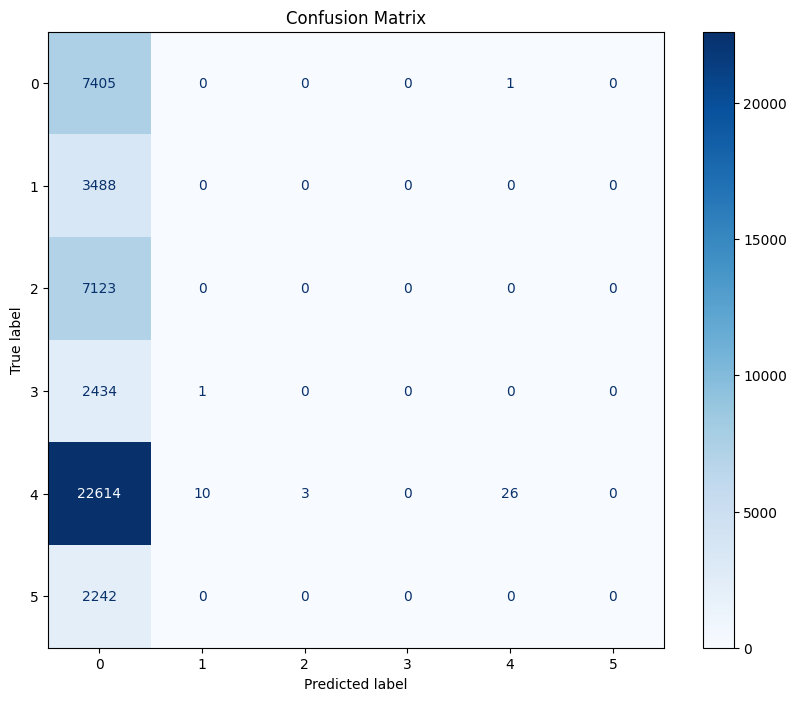

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class probabilities on the test set
y_pred_probs = model.predict(X_test_model)
# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probs, axis=1)
# Convert one-hot encoded true labels to class indices
y_true = np.argmax(y_test_model, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix using scikit-learn's built-in display
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
